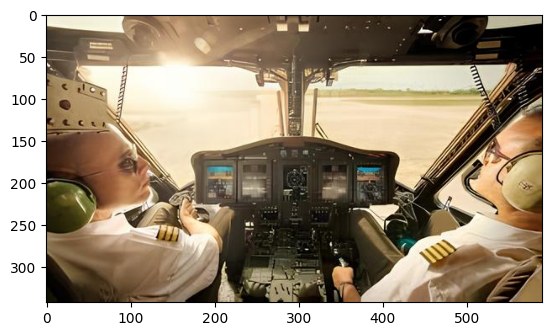

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('aviao4.jpg'))

## Faz análise dos dados de fatores contribuintes e recomendações de segurança em acidentes aeronáuticos

Este projeto tem como objetivo fazer uma análise ampla dos dados de fatores contribuintes e recomendações de segurança em acidentes aeronáuticos limpos e tratados no projeto Cenipa_limpa_trata_armazena, oferecendo uma visão ampla com a descrição e diagnóstico dos dados.

In [2]:
# importa bibliotecas
import pandas as pd
from pandasql import sqldf
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [3]:
# le os acidentes tratados para análise
df_acidentes = pd.read_csv('arquivos_tratados/df_acidentes_aeronauticos.csv')

In [4]:
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,NaN,1,NÃO,NaN,NaN,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,NaN,1,NÃO,NaN,NaN,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,NaN,1,NÃO,NaN,NaN,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00


In [5]:
# verifica nome das colunas
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

## Fator Nome

In [6]:
# conta a quantidade de fator e agrupa
df_aux = sqldf('select fator_nome as fatorx, ' \
                'count(fator_nome) as qtde_fator_nome ' \
                'from df_acidentes ' \
                'group by fator_nome  '
                )

In [7]:
# calcula percentual de fator_nome
df_aux['perc_fator_nome'] = round((df_aux.qtde_fator_nome / df_aux.qtde_fator_nome.sum())*100, 2)

In [8]:
# junta perc qtde
df_acidentes = sqldf('select * ' \
                     'from df_acidentes ac ' \
                     'inner join df_aux ax on (ac.fator_nome = ax.fatorx)'
                     )

In [9]:
# apaga colunas duplicadas
df_acidentes = df_acidentes.drop(columns=['fatorx'], axis=1)

In [10]:
# verifica as linhas iniciais
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo,qtde_fator_nome,perc_fator_nome
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00,7839,79.84
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,None,1,NÃO,None,None,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84


In [11]:
# elimina linhas duplicadas
df_acidentes = df_acidentes.drop_duplicates()
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

## fator_aspecto

In [12]:
# conta a quantidade de fator aspecto e agrupa
df_aux = sqldf('select fator_aspecto as aspectox, ' \
                'count(fator_aspecto) as qtde_aspecto ' \
                'from df_acidentes ' \
                'group by fator_aspecto '
                )

In [13]:
# calcula percentual de tipo de veículo
df_aux['perc_aspecto'] = round((df_aux.qtde_aspecto / df_aux.qtde_aspecto.sum())*100, 2)

In [14]:
# junta perc qtde
df_acidentes = sqldf('select * ' \
                     'from df_acidentes ac ' \
                     'inner join df_aux ax on (ac.fator_aspecto = ax.aspectox)'
                     )

In [15]:
# apaga colunas duplicadas
df_acidentes = df_acidentes.drop(columns=['aspectox'], axis=1)

In [16]:
# verifica as linhas iniciais
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo,qtde_fator_nome,perc_fator_nome,qtde_aspecto,perc_aspecto
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00,7839,79.84,7839,79.84
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84,7839,79.84
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,None,1,NÃO,None,None,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84,7839,79.84


In [17]:
# elimina linhas duplicadas
df_acidentes = df_acidentes.drop_duplicates()
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

## fator_condicionante

In [18]:
# conta a quantidade de fator_condicionante e agrupa
df_aux = sqldf('select fator_condicionante as condicionantex, ' \
                'count(fator_condicionante) as qtde_condicionante ' \
                'from df_acidentes ' \
                'group by fator_condicionante '
                )

In [19]:
# calcula percentual de tipo de veículo
df_aux['perc_condicionante'] = round((df_aux.qtde_condicionante / df_aux.qtde_condicionante.sum())*100, 2)

In [20]:
# junta perc qtde
df_acidentes = sqldf('select * ' \
                     'from df_acidentes ac ' \
                     'inner join df_aux ax on (ac.fator_condicionante = ax.condicionantex)'
                     )

In [21]:
# apaga colunas duplicadas
df_acidentes = df_acidentes.drop(columns=['condicionantex'], axis=1)

In [22]:
# verifica as linhas iniciais
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo,qtde_fator_nome,perc_fator_nome,qtde_aspecto,perc_aspecto,qtde_condicionante,perc_condicionante
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00,7839,79.84,7839,79.84,8028,81.76
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84,7839,79.84,8028,81.76
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,None,1,NÃO,None,None,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84,7839,79.84,8028,81.76


In [23]:
# elimina linhas duplicadas
df_acidentes = df_acidentes.drop_duplicates()
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

## fator_area

In [24]:
# conta a quantidade de fator_area e agrupa
df_aux = sqldf('select fator_area as fator_areax, ' \
                'count(fator_area) as qtde_area ' \
                'from df_acidentes ' \
                'group by fator_area '
                )

In [25]:
# calcula percentual de tipo de veículo
df_aux['perc_area'] = round((df_aux.qtde_area / df_aux.qtde_area.sum())*100, 2)

In [26]:
# junta perc qtde
df_acidentes = sqldf('select * ' \
                     'from df_acidentes ac ' \
                     'inner join df_aux ax on (ac.fator_area = ax.fator_areax)'
                     )

In [27]:
# apaga colunas duplicadas
df_acidentes = df_acidentes.drop(columns=['fator_areax'], axis=1)

In [28]:
# verifica as linhas iniciais
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo,qtde_fator_nome,perc_fator_nome,qtde_aspecto,perc_aspecto,qtde_condicionante,perc_condicionante,qtde_area,perc_area
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00,7839,79.84,7839,79.84,8028,81.76,7839,79.84
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84,7839,79.84,8028,81.76,7839,79.84
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,None,1,NÃO,None,None,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84,7839,79.84,8028,81.76,7839,79.84


In [29]:
# elimina linhas duplicadas
df_acidentes = df_acidentes.drop_duplicates()
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

## recomendacao_conteudo

In [30]:
# conta a quantidade de recomendacao_conteudo e agrupa
df_aux = sqldf('select recomendacao_conteudo as recomendacao_conteudox, ' \
                'count(recomendacao_conteudo) as qtde_rec_conteudo ' \
                'from df_acidentes ' \
                'group by recomendacao_conteudo '
                )

In [31]:
# calcula percentual de tipo de veículo
df_aux['perc_rec_conteudo'] = round((df_aux.qtde_rec_conteudo / df_aux.qtde_rec_conteudo.sum())*100, 2)

In [32]:
# junta perc qtde
df_acidentes = sqldf('select * ' \
                     'from df_acidentes ac ' \
                     'inner join df_aux ax on (ac.recomendacao_conteudo = ax.recomendacao_conteudox)'
                     )

In [33]:
# apaga colunas duplicadas
df_acidentes = df_acidentes.drop(columns=['recomendacao_conteudox'], axis=1)

In [34]:
# verifica as linhas iniciais
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo,qtde_fator_nome,perc_fator_nome,qtde_aspecto,perc_aspecto,qtde_condicionante,perc_condicionante,qtde_area,perc_area,qtde_rec_conteudo,perc_rec_conteudo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00,7839,79.84,7839,79.84,8028,81.76,7839,79.84,8561,87.19
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84,7839,79.84,8028,81.76,7839,79.84,8561,87.19
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,None,1,NÃO,None,None,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84,7839,79.84,8028,81.76,7839,79.84,8561,87.19


In [35]:
# elimina linhas duplicadas
df_acidentes = df_acidentes.drop_duplicates()
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

## recomendacao_status

In [36]:
# conta a quantidade derecomendacao_status e agrupa
df_aux = sqldf('select recomendacao_status as recomendacao_statusx, ' \
                'count(recomendacao_status) as qtde_rec_status ' \
                'from df_acidentes ' \
                'group by recomendacao_status '
                )

In [37]:
# calcula percentual de tipo de veículo
df_aux['perc_rec_status'] = round((df_aux.qtde_rec_status / df_aux.qtde_rec_status.sum())*100, 2)

In [38]:
# junta perc qtde
df_acidentes = sqldf('select * ' \
                     'from df_acidentes ac ' \
                     'inner join df_aux ax on (ac.recomendacao_status = ax.recomendacao_statusx)'
                     )

In [39]:
# apaga colunas duplicadas
df_acidentes = df_acidentes.drop(columns=['recomendacao_statusx'], axis=1)

In [40]:
# verifica as linhas iniciais
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo,qtde_fator_nome,perc_fator_nome,qtde_aspecto,perc_aspecto,qtde_condicionante,perc_condicionante,qtde_area,perc_area,qtde_rec_conteudo,perc_rec_conteudo,qtde_rec_status,perc_rec_status
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00,7839,79.84,7839,79.84,8028,81.76,7839,79.84,8561,87.19,8660,88.2
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84,7839,79.84,8028,81.76,7839,79.84,8561,87.19,8660,88.2
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,None,1,NÃO,None,None,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84,7839,79.84,8028,81.76,7839,79.84,8561,87.19,8660,88.2


In [41]:
# elimina linhas duplicadas
df_acidentes = df_acidentes.drop_duplicates()
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

## recomendacao_destinatario_sigla

In [42]:
# conta a quantidade de recomendacao_destinatario e agrupa
df_aux = sqldf('select recomendacao_destinatario as recomendacao_destinatariox, ' \
                'recomendacao_destinatario_sigla as siglax, ' \
                'count(recomendacao_destinatario_sigla) as qtde_rec_dest ' \
                'from df_acidentes ' \
                'group by recomendacao_destinatario, recomendacao_destinatario_sigla '
                )

In [43]:
# calcula percentual de tipo de veículo
df_aux['perc_rec_dest'] = round((df_aux.qtde_rec_dest / df_aux.qtde_rec_dest.sum())*100, 2)

In [44]:
# junta perc qtde
df_acidentes = sqldf('select * ' \
                     'from df_acidentes ac ' \
                     'inner join df_aux ax on (ac.recomendacao_destinatario = ax.recomendacao_destinatariox)'
                     )

In [45]:
# apaga colunas duplicadas
df_acidentes = df_acidentes.drop(columns=['recomendacao_destinatariox', 'siglax'], axis=1)

In [46]:
# verifica as linhas iniciais
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo,qtde_fator_nome,perc_fator_nome,qtde_aspecto,perc_aspecto,qtde_condicionante,perc_condicionante,qtde_area,perc_area,qtde_rec_conteudo,perc_rec_conteudo,qtde_rec_status,perc_rec_status,qtde_rec_dest,perc_rec_dest
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-15 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00,7839,79.84,7839,79.84,8028,81.76,7839,79.84,8561,87.19,8660,88.2,8561,87.19
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-15 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84,7839,79.84,8028,81.76,7839,79.84,8561,87.19,8660,88.2,8561,87.19
2,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2007-01-02,2024-05-15 22:35:00,None,1,NÃO,None,None,CSTDI,AVIÃO,AIRBUS INDUSTRIE,A310,***,JATO,BIMOTOR,0,0,0.0,0.0,PORTUGAL,PORTUGAL,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,***,***,0,FALHA DO MOTOR NO SOLO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,***,***,***,***,***,***,***,***,18:00 às 00:00,7839,79.84,7839,79.84,8028,81.76,7839,79.84,8561,87.19,8660,88.2,8561,87.19


In [47]:
# elimina linhas duplicadas
df_acidentes = df_acidentes.drop_duplicates()
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              7238 non-null   object 
 11  ocorrencia_longitude             7238 non-null   object 
 12  aeronave_matricula  

In [48]:
# salva os dados para análise em arquivo csv
df_acidentes.to_csv('arquivos_analise/df_acidentes_analise_fator_recomendacao.csv', index=False)

- A análise dos dados gravados em arquivos csv anteriormente será feita no projeto Cenipa_dash_analitico publicado no endereço:
https://github.com/jairobernardesjunior/Cenipa_dash_analitico